# Лабораторная работа №5

## Метод сеток решения волнового уравнения

### Вариант 19

***Задание 1.*** Рассчитать колебания $u(x,t)$. 

Продольные колебания $u(x,t)$ тяги описываются уравнением
$$ \frac{\partial^2u}{\partial t^2} - \frac{\rho}{E}\frac{\partial^2u}{\partial x^2} = 0, 0<x<L, $$
$$ u(0,t)=0, u(L,t)=0, 0 \le t \lt T,$$

где $E$ - модуль упругости; $\rho$ - плотность материала стержня.

Тяга имеет длину $L$ и закреплена на концах. Захватив тягу в центре, ее деформируют так, что продольное перемещение становиться равным $\Delta u$:
$$u(x,0) = -\frac{\rho}{E}\frac{\partial^2u}{\partial x^2}$$
Затем тяга освобождается.

Рассчитайте колебания $u(x,t)$ при заданных параметрах.

***Задание 2.*** Рассчитать колебания тонкой пластины

Колебания тонкой пластины без учета потерь на трение описываются нормированным волновым уравнением вида 

$$ \frac{\partial^2u}{\partial t^2} - (\frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2}) = 0, $$

где $u(x,y,t)$ - деформация пластины; $x, y$ - координаты; $t$ - время.

Рассчитать колебания пластины при заданных размерах $a$ и $b$, граничных $\Gamma_1, \Gamma_2, \Gamma_3, \Gamma_4$, и начальных $u(x,y,0)$ и $\frac{\partial u(x,y,0)}{\partial t}$ условиях.

### Задание 1

Аппроксимируем вторые производные следующими схемами:
$$ \frac {\partial^2 u}{\partial x^2} = \frac {u(x+h, t) - 2u(x, t) + u(x-h, t)}{h^2} $$
$$ \frac {\partial^2 u}{\partial t^2} = \frac {u(x, t+\tau) - 2u(x, t) + u(x, t-\tau)}{t^2} $$

Тогда получим:
$$\frac {(u_{j}^{i+1} - 2\cdot u_j^i + u_{j}^{i-1})}{\tau^2} = \frac{\rho}{E} \frac {(u_{j+1}^i - 2\cdot u_j^i + u_{j-1}^i)}{h^2}
$$
Выражаем отсюда $u_{j}^{i+1}$:
$$
u_{j}^{i+1} = \frac{ \rho \tau^2}{E h^2} {(u_{j+1}^i - 2\cdot u_j^i + u_{j-1}^i)} + 2\cdot u_j^i - u_{j}^{i-1};
$$

Получили явную трехслойную схему с шаблоном: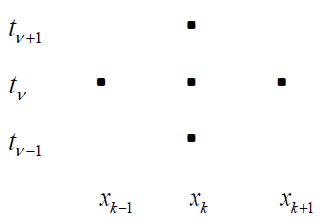

Тогда, учитывая начальные и граничные условия:

$$
u(x, 0) = p(x),\ \frac {\partial u(x, 0)}{\partial t} = q(x),\ u(0, t)= 0,\ u(L, t) = 0
$$

аппроксимируя которые, получаем:
$$u_{j}^0 = p_{j} $$
$$
u_{j}^1 = u_{j}^0 + \tau \cdot \frac {\partial u_{j}^0}{\partial t} + \frac {\tau^2}{2} \frac {\partial u_{j}^0}{\partial t^2} = p_{j} + \tau \cdot q_{j} + \frac {\tau^2 \rho}{2\cdot E} \frac {\partial^2 u_j}{\partial x^2} = p_{j} + \tau \cdot q_{j} + \frac {\tau^2 \rho}{2\cdot h^2 E} (p_{j+1} - 2\cdot p_j + p_{j-1})
$$

можем решить задачу.

In [6]:
# importing necessary libraries

import numpy as np
import scipy as sp
from scipy.misc import derivative 
from scipy import sparse
from scipy import integrate
import matplotlib.pyplot as plt

In [64]:
# variant 19 -> 19 mod 6 + 1 = 2

L = 18
u = 0.2
E = 120e9
rho = 5.9e3
p = lambda x: -4 * u / (L ** 2) * x ** 2  + 4 * u / L * x # ?
q = lambda x: 0 # ? 
NK = 100
h = L / NK
c = 0.0001
t = c * h
NT = 400
print(t ** 2 * E / (2 * rho * h ** 2))

0.1016949152542373


In [71]:
def solve1():
    M = np.zeros(shape=(NT, NK))
    X = np.linspace(0, L, NK)
    M[0, :] = np.array([p(i) for i in np.linspace(0, L, NK)])
    M[:, 0] = np.array([0 for i in np.linspace(0, u, NT)])
    M[:, -1] = np.array([0 for i in np.linspace(0, u, NT)])
    M[1, 1:-1] = t * q(X[1:-1]) + p(X[1:-1]) + t ** 2 * E / (2 * rho * h ** 2) * (p(X[2:]) - 2 * p(X[1:-1]) + p(X[:-2]))
    
    for i in range(2, NT):
        M[i, 1:-1] = (t ** 2 * E) / (rho * h ** 2) * (M[i-1, 2:] - 2 * M[i-1, 1:-1] + M[i-1, :-2]) + 2 * M[i-1, 1:-1] - M[i-2, 1:-1]
    return M

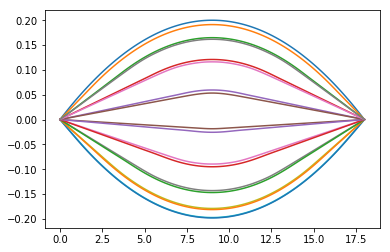

In [73]:
matrix = solve1()
X = np.linspace(0, L, NK)

for i in range(0, NT, NT//17):
    plt.plot(X, matrix[i], label=i)
#plt.legend()
plt.show()